In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from statistics import mean
import matplotlib.pyplot as plt
import warnings
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score , classification_report, precision_score, recall_score, f1_score , roc_auc_score
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler,RobustScaler

In [2]:
df=pd.read_csv("heart_failure_clinical_records_dataset.csv")

In [3]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [5]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [6]:
df["DEATH_EVENT"].value_counts()

DEATH_EVENT
0    203
1     96
Name: count, dtype: int64

In [7]:
# there is no big data imbalancing problem.

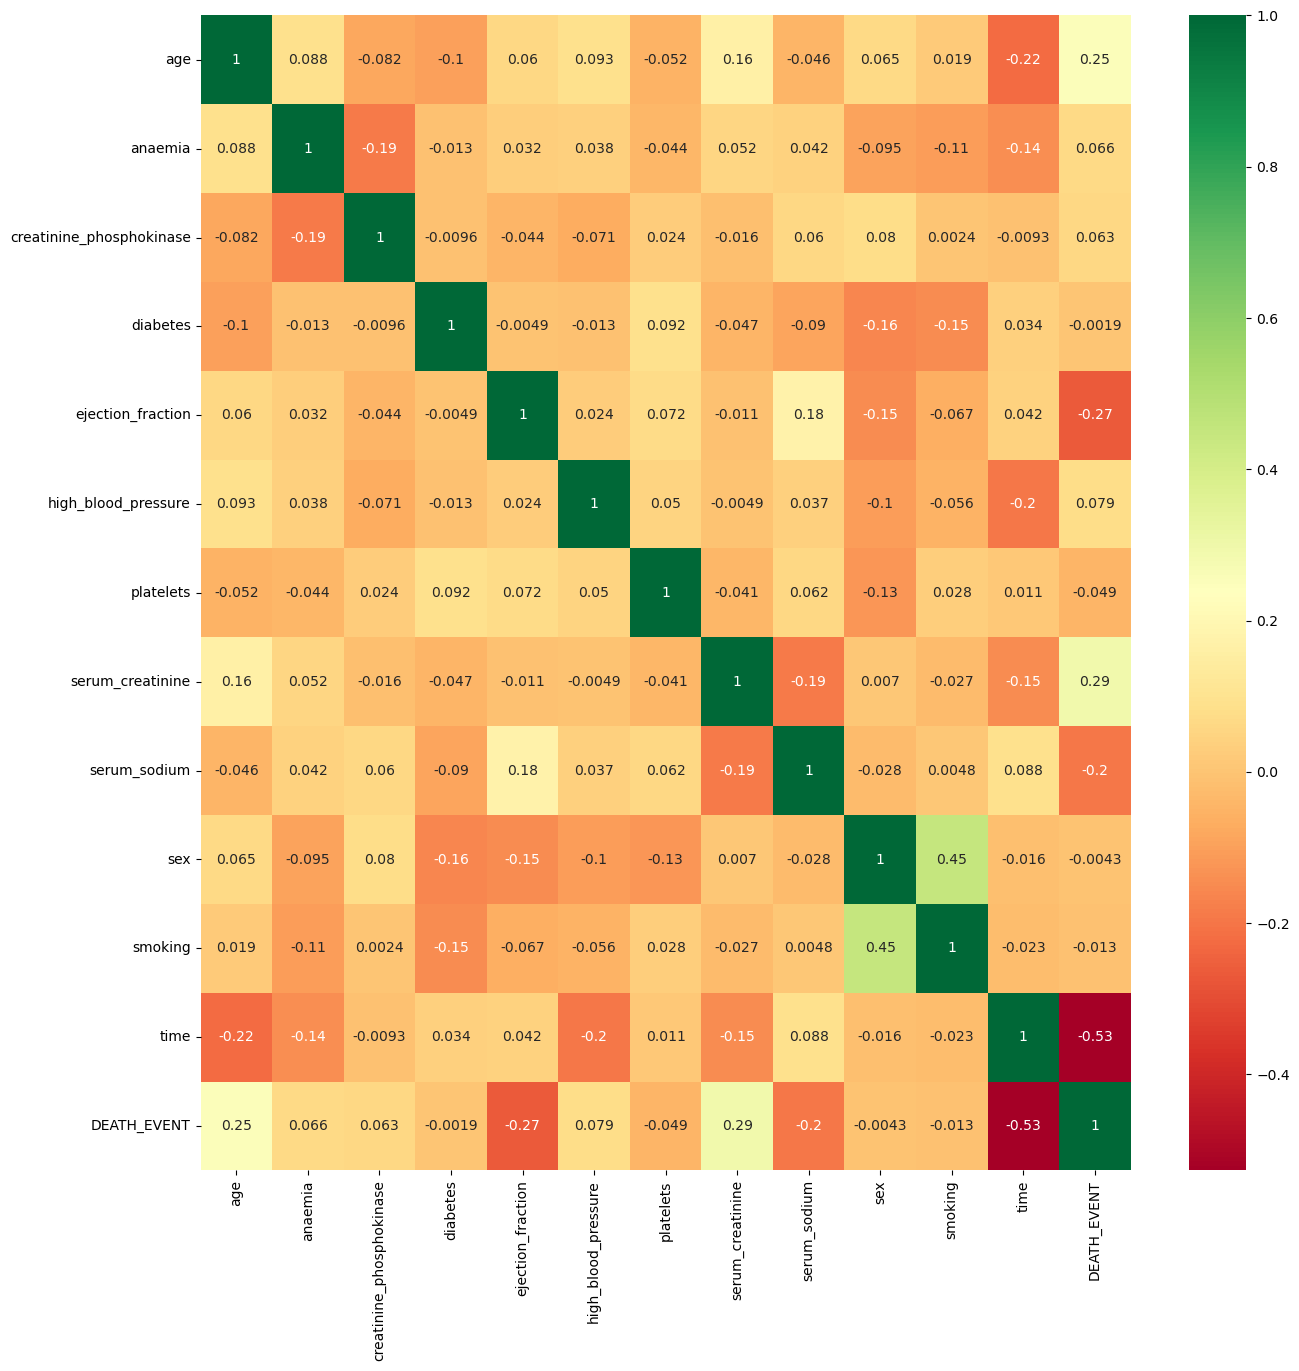

In [8]:
corr = df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr,annot=True,cmap="RdYlGn")
plt.show()

In [9]:
#no independent variable is highly correlated with each other.

In [10]:
df.shape

(299, 13)

In [11]:
df.duplicated().sum()

0

In [12]:
# there are no rows which are dubplicated.

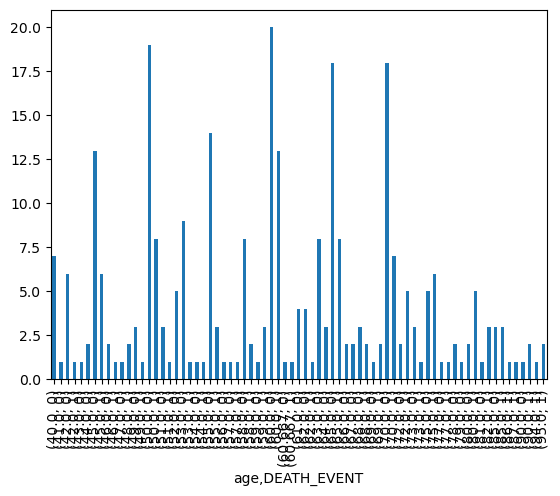

In [13]:
life=df.groupby(["age","DEATH_EVENT"]).size().plot(kind="bar")
plt.show()

In [14]:
bins = range(40,95, 5)  

# Create the frequency table using cut and value_counts
df_grouped = df.groupby(pd.cut(df["age"], bins))[["DEATH_EVENT"]].value_counts().unstack(fill_value=0)

# Print the frequency table
print(df_grouped.to_string())

DEATH_EVENT   0   1
age                
(40, 45]     23   7
(45, 50]     25  12
(50, 55]     32   6
(55, 60]     31  19
(60, 65]     38  10
(65, 70]     26  11
(70, 75]     10  12
(75, 80]      6   6
(80, 85]      4   6
(85, 90]      1   4


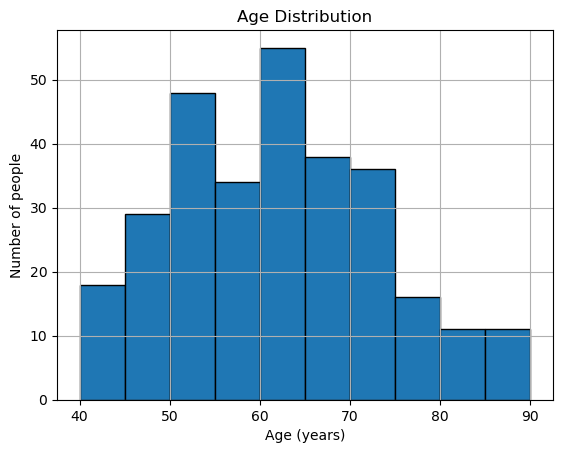

In [15]:
plt.hist(df["age"], bins=bins, edgecolor='black')
plt.xlabel("Age (years)")
plt.ylabel("Number of people")
plt.title("Age Distribution")
plt.grid(True)
plt.show()

In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF"]=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif["variable"]=X.columns

NameError: name 'X' is not defined

In [ ]:
vif

In [ ]:
#X.drop("serum_sodium",axis=1,inplace=True)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF"]=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif["variable"]=X.columns

In [ ]:
vif

In [17]:
X=df.drop(columns=["DEATH_EVENT"],axis=1)
Y=df["DEATH_EVENT"]

In [18]:
X.shape

(299, 12)

In [19]:
Y.shape

(299,)

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=1)

In [21]:
X_train.shape

(209, 12)

In [22]:
X_test.shape

(90, 12)

In [23]:
Y_test.shape

(90,)

In [24]:
Y_train.shape

(209,)

In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)

In [26]:
X_test_scaled

array([[0.18181818, 1.        , 0.01173769, ..., 1.        , 0.        ,
        0.51449275],
       [0.09090909, 0.        , 0.07131921, ..., 0.        , 0.        ,
        0.89130435],
       [0.23636364, 1.        , 0.00867568, ..., 0.        , 0.        ,
        0.14130435],
       ...,
       [0.18181818, 1.        , 0.13115591, ..., 0.        , 0.        ,
        0.87681159],
       [0.27272727, 0.        , 0.07004338, ..., 0.        , 0.        ,
        0.76449275],
       [0.14545455, 1.        , 0.07131921, ..., 0.        , 0.        ,
        0.03985507]])

In [29]:
lr=LogisticRegression()

In [30]:
lr

LogisticRegression()

In [31]:
lr_model=lr.fit(X_train_scaled,Y_train)

In [32]:
Y_pred_lr=lr_model.predict(X_test_scaled)

In [35]:
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

In [36]:
cr_lr=classification_report(Y_test,Y_pred_lr)

In [38]:
print(cr_lr)

              precision    recall  f1-score   support

           0       0.85      0.94      0.89        64
           1       0.79      0.58      0.67        26

    accuracy                           0.83        90
   macro avg       0.82      0.76      0.78        90
weighted avg       0.83      0.83      0.82        90



In [42]:
acc_lr=accuracy_score(Y_test,Y_pred_lr)

In [43]:
print(acc_lr)

0.8333333333333334


In [39]:
dt_model=DecisionTreeClassifier()

In [40]:
dt_model.fit(X_train_scaled,Y_train)

DecisionTreeClassifier()

In [44]:
Y_pred_dt=dt_model.predict(X_test_scaled)

In [45]:
acc_dt=accuracy_score(Y_test,Y_pred_dt)

In [46]:
print(acc_dt)

0.7888888888888889


In [47]:
cm_dt=confusion_matrix(Y_test,Y_pred_dt)

In [48]:
cm_dt

array([[55,  9],
       [10, 16]], dtype=int64)

In [49]:
cr_dt=classification_report(Y_test,Y_pred_dt)

In [50]:
print(cr_dt)

              precision    recall  f1-score   support

           0       0.85      0.86      0.85        64
           1       0.64      0.62      0.63        26

    accuracy                           0.79        90
   macro avg       0.74      0.74      0.74        90
weighted avg       0.79      0.79      0.79        90



In [51]:
rf_model= RandomForestClassifier()

In [52]:
rf_model

RandomForestClassifier()

In [55]:
rf_model.fit(X_train_scaled,Y_train)

RandomForestClassifier()

In [56]:
Y_pred_rf = rf_model.predict(X_test_scaled)

In [57]:
acc_rf=accuracy_score(Y_test,Y_pred_rf)

In [58]:
acc_rf

0.9

In [59]:
cm_rf = confusion_matrix(Y_test,Y_pred_rf)

In [60]:
cm_rf

array([[62,  2],
       [ 7, 19]], dtype=int64)

In [61]:
cr_rf=classification_report(Y_test,Y_pred_rf)

In [62]:
print(cr_rf)

              precision    recall  f1-score   support

           0       0.90      0.97      0.93        64
           1       0.90      0.73      0.81        26

    accuracy                           0.90        90
   macro avg       0.90      0.85      0.87        90
weighted avg       0.90      0.90      0.90        90



In [63]:
#using ranmdom forest has increased precision recall and f1 score.

In [64]:
ab_model = AdaBoostClassifier()

In [65]:
ab_model

AdaBoostClassifier()

In [66]:
ab_model.fit(X_train_scaled,Y_train)

AdaBoostClassifier()

In [68]:
Y_pred_ab=ab_model.predict(X_test_scaled)

In [70]:
acc_ab=accuracy_score(Y_test,Y_pred_ab)

In [71]:
acc_ab

0.8222222222222222

In [72]:
cm_ab=confusion_matrix(Y_test,Y_pred_ab)

In [73]:
cm_ab

array([[58,  6],
       [10, 16]], dtype=int64)

In [74]:
cr_ab=classification_report(Y_test,Y_pred_ab)

In [75]:
print(cr_ab)

              precision    recall  f1-score   support

           0       0.85      0.91      0.88        64
           1       0.73      0.62      0.67        26

    accuracy                           0.82        90
   macro avg       0.79      0.76      0.77        90
weighted avg       0.82      0.82      0.82        90



In [76]:
from sklearn.ensemble import BaggingClassifier

In [77]:
bc_model=BaggingClassifier()

In [78]:
bc_model.fit(X_train_scaled,Y_train)

BaggingClassifier()

In [79]:
Y_pred_bc=bc_model.predict(X_test_scaled)

In [80]:
acc_bc=accuracy_score(Y_test,Y_pred_bc)

In [81]:
acc_bc

0.7888888888888889

In [82]:
cm_bc=confusion_matrix(Y_test,Y_pred_bc)

In [83]:
cm_bc

array([[56,  8],
       [11, 15]], dtype=int64)

In [84]:
cr_bc=classification_report(Y_test,Y_pred_bc)

In [85]:
print(cr_bc)

              precision    recall  f1-score   support

           0       0.84      0.88      0.85        64
           1       0.65      0.58      0.61        26

    accuracy                           0.79        90
   macro avg       0.74      0.73      0.73        90
weighted avg       0.78      0.79      0.78        90



In [86]:
from sklearn.ensemble import GradientBoostingClassifier

In [87]:
gb_model = GradientBoostingClassifier()

In [89]:
gb_model.fit(X_train_scaled,Y_train)

GradientBoostingClassifier()

In [90]:
Y_pred_gb = gb_model.predict(X_test_scaled)

In [91]:
cm_gb=confusion_matrix(Y_test,Y_pred_gb)

In [92]:
cm_gb

array([[59,  5],
       [ 8, 18]], dtype=int64)

In [93]:
cr_gb=classification_report(Y_test,Y_pred_gb)

In [94]:
print(cr_gb)

              precision    recall  f1-score   support

           0       0.88      0.92      0.90        64
           1       0.78      0.69      0.73        26

    accuracy                           0.86        90
   macro avg       0.83      0.81      0.82        90
weighted avg       0.85      0.86      0.85        90



In [96]:
import xgboost
from xgboost import XGBClassifier

In [99]:
xgb_model =xgboost.XGBClassifier()

In [100]:
xgb_model.fit(X_train_scaled,Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [101]:
Y_pred_xgb = xgb_model.predict(X_test_scaled)

In [102]:
acc_xgb=accuracy_score(Y_test,Y_pred_xgb)

In [103]:
acc_xgb

0.8777777777777778

In [104]:
cr_xgb=classification_report(Y_test,Y_pred_xgb)

In [105]:
print(cr_xgb)

              precision    recall  f1-score   support

           0       0.92      0.91      0.91        64
           1       0.78      0.81      0.79        26

    accuracy                           0.88        90
   macro avg       0.85      0.86      0.85        90
weighted avg       0.88      0.88      0.88        90



In [106]:
cm_xgb=confusion_matrix(Y_test,Y_pred_xgb)

In [107]:
cm_xgb

array([[58,  6],
       [ 5, 21]], dtype=int64)

In [108]:
#i think random forest is the best as there are less false negative . a person who has disease will have the least chance of predicted wrong.